# Explore here

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
total_data= pd.read_csv('../data/Aquifer_Petrignano.csv')
total_data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [75]:
print(total_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB
None


In [76]:
total_data = total_data[total_data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
total_data = total_data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  4199 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Volume_C10_Petrignano                 4198 non-null   float64
 5   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB
None


In [77]:
total_data.columns = ['fecha', 'lluviosidad', 'profundidad', 'temperatura', 'volumen_de_drenado', 'hidrometria_de_rio']

In [78]:
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               4199 non-null   object 
 1   lluviosidad         4199 non-null   float64
 2   profundidad         4172 non-null   float64
 3   temperatura         4199 non-null   float64
 4   volumen_de_drenado  4198 non-null   float64
 5   hidrometria_de_rio  4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB
None


In [118]:
total_data.isnull().sum().sort_values(ascending=False)

fecha                 0
lluviosidad           0
profundidad           0
temperatura           0
volumen_de_drenado    0
hidrometria_de_rio    0
dtype: int64

#### La variable objetivo es la profundidad: 'profundidad'

In [109]:
total_data['fecha'] = pd.to_datetime(total_data['fecha'], format = '%d/%m/%Y')
new_data = total_data.set_index('fecha')
new_data.head(5)

,lluviosidad,profundidad,temperatura,volumen_de_drenado,hidrometria_de_rio
fecha,,,,,
2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


#### Graficando cada columna

C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_5692\3421584838.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
C:\Users\Pedro Caliman\AppData\Local\Temp\ipykernel_

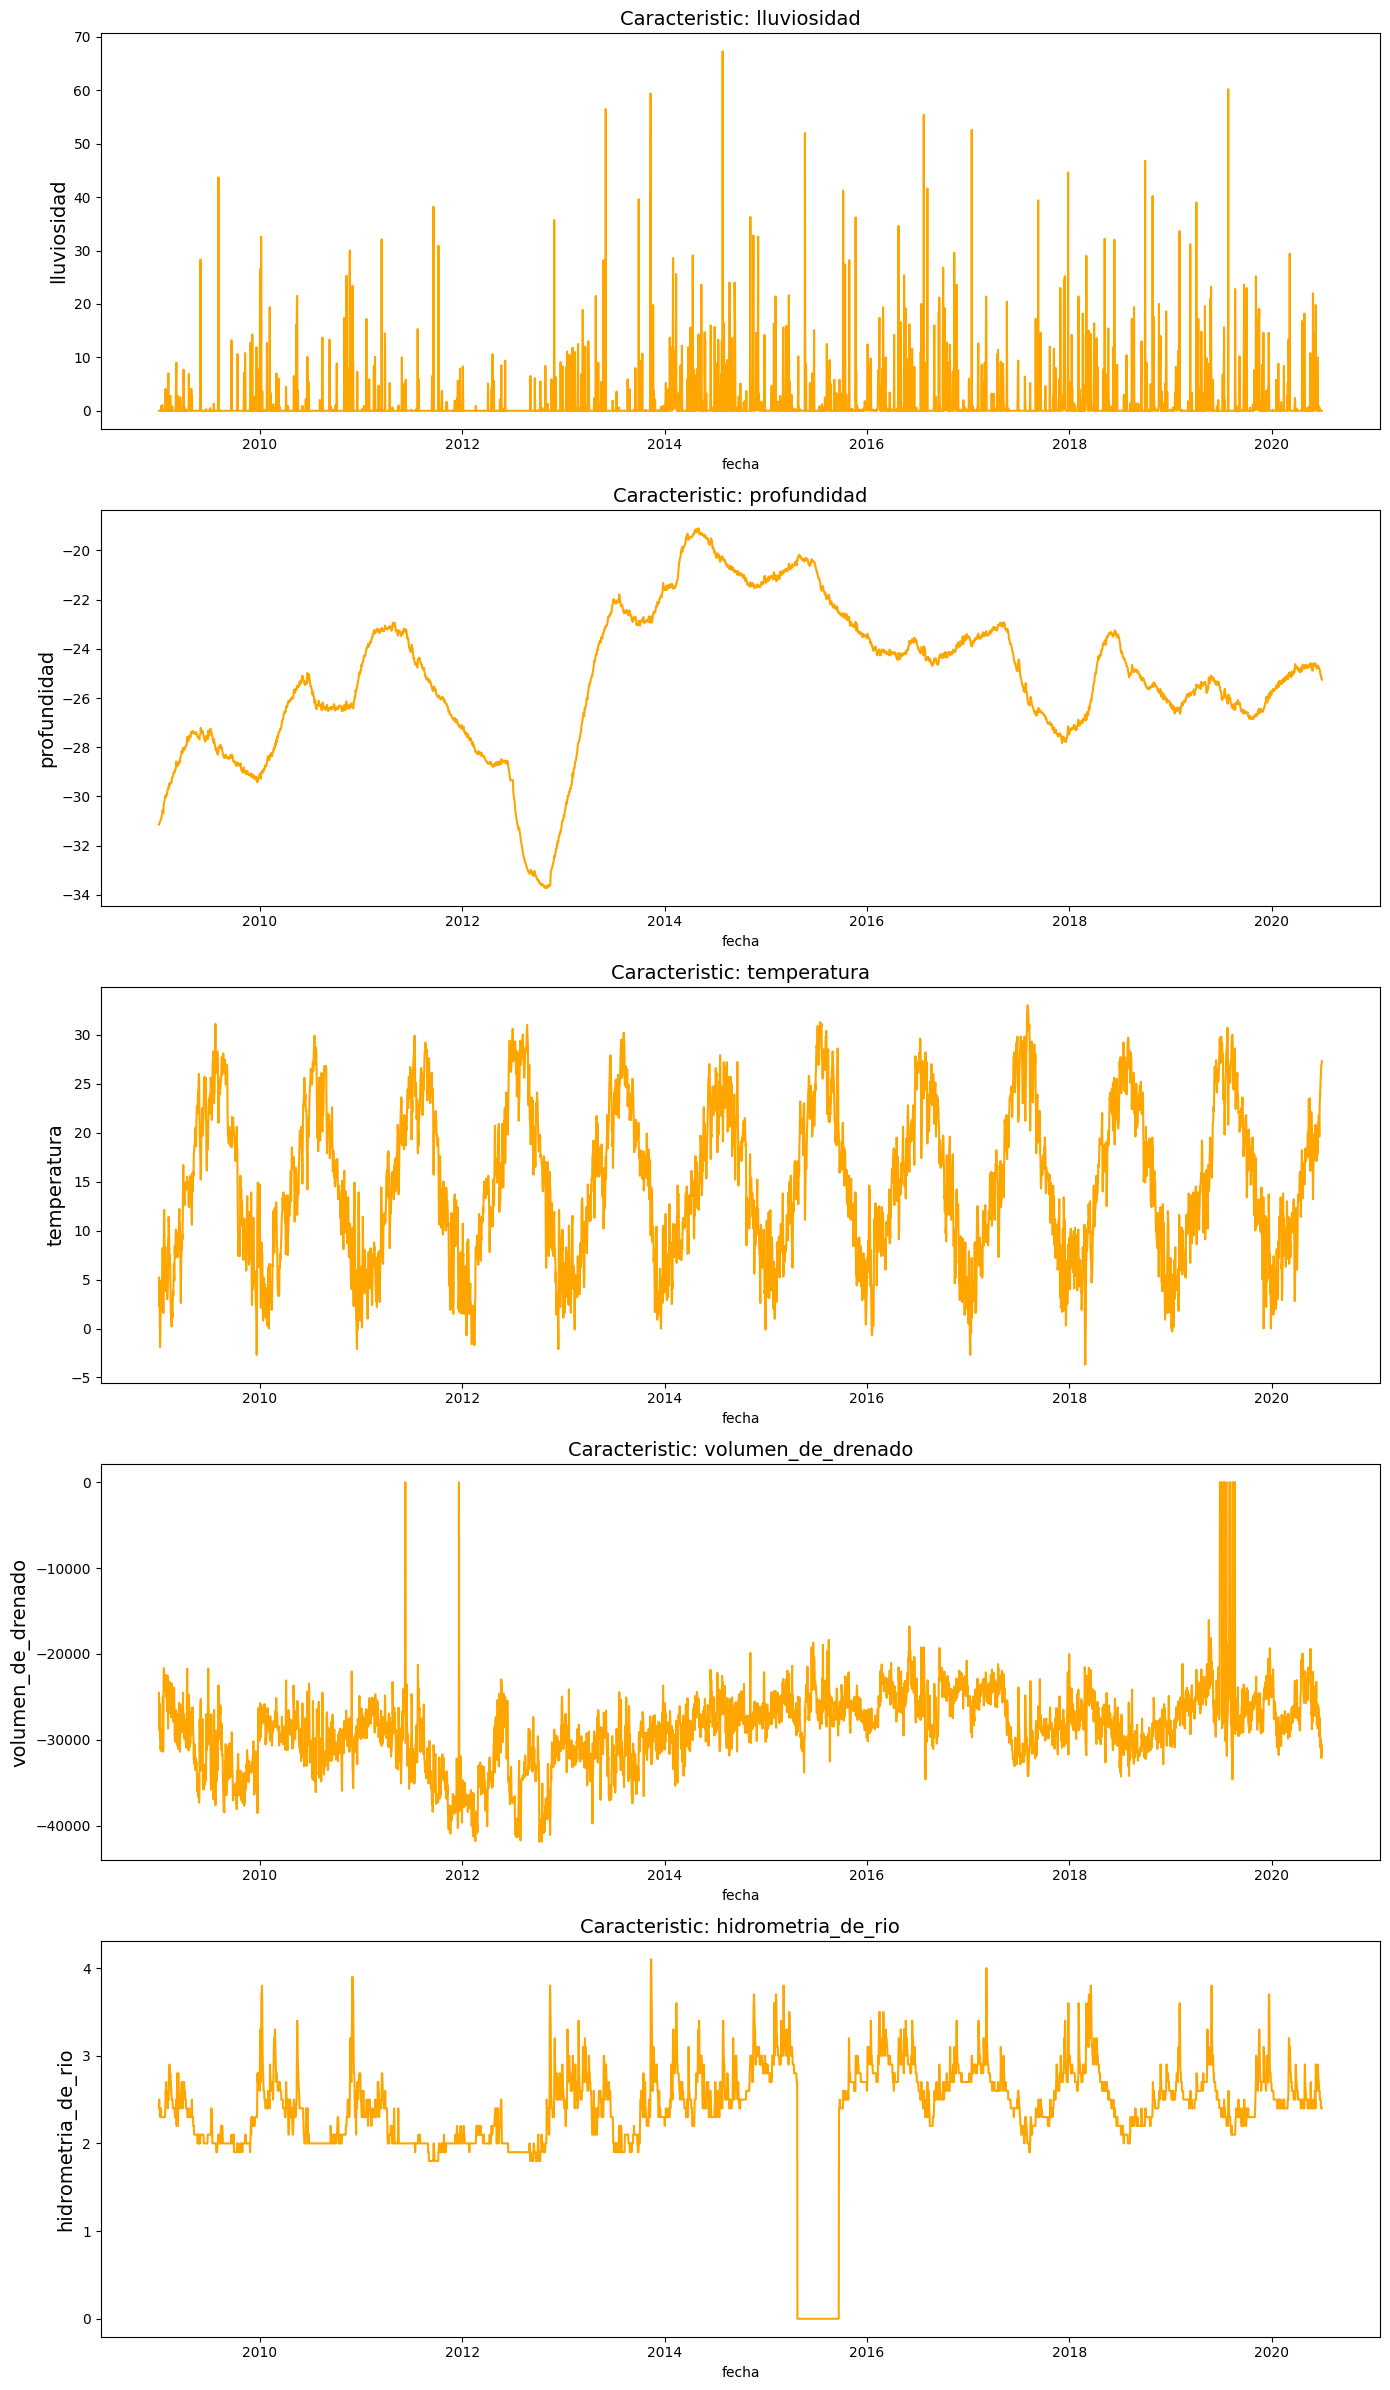

In [110]:
fig, ax = plt.subplots(5, 1, figsize = (14, 24))

for i, column in enumerate(total_data.drop('fecha', axis=1).columns):
    sns.lineplot(x=total_data['fecha'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='orange')
    ax[i].set_title('Caracteristic: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

plt.tight_layout()
plt.show()

In [111]:
print(total_data.describe())

                     fecha  lluviosidad  profundidad  temperatura  \
count                 4199  4199.000000  4172.000000  4199.000000   
mean   2014-10-01 00:00:00     1.556633   -25.182534    15.030293   
min    2009-01-01 00:00:00     0.000000   -33.710000    -3.700000   
25%    2011-11-16 12:00:00     0.000000   -26.860000     8.800000   
50%    2014-10-01 00:00:00     0.000000   -25.170000    14.700000   
75%    2017-08-15 12:00:00     0.100000   -23.270000    21.400000   
max    2020-06-30 00:00:00    67.300000   -19.100000    33.000000   
std                    NaN     5.217923     2.945074     7.794871   

       volumen_de_drenado  hidrometria_de_rio  
count         4199.000000         4199.000000  
mean        -28669.156619            2.372517  
min         -41890.176000            0.000000  
25%         -31082.400000            2.100000  
50%         -28391.040000            2.400000  
75%         -26043.984000            2.700000  
max              0.000000            4.100

#### La estadistica de la profundidad contiene valores, N/A por lo que vamos a sustituir esos  Valores con el Promedio de la Estadistica

In [117]:
mean_value = total_data['profundidad'].mean()
total_data['profundidad'] = total_data['profundidad'].fillna(mean_value)


In [113]:
mean_value = total_data['volumen_de_drenado'].mean()
total_data['volumen_de_drenado'] = total_data['volumen_de_drenado'].fillna(mean_value)

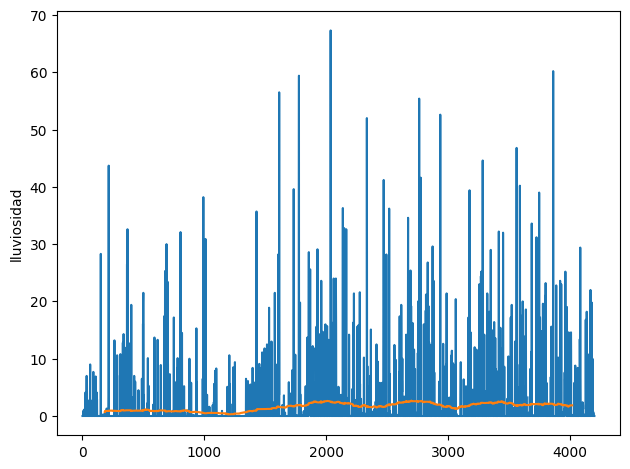

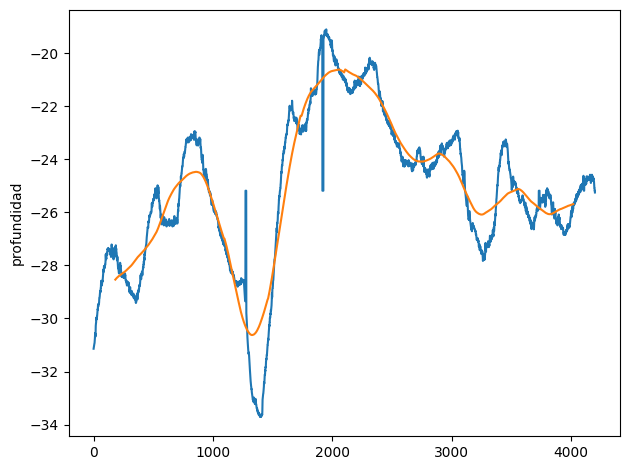

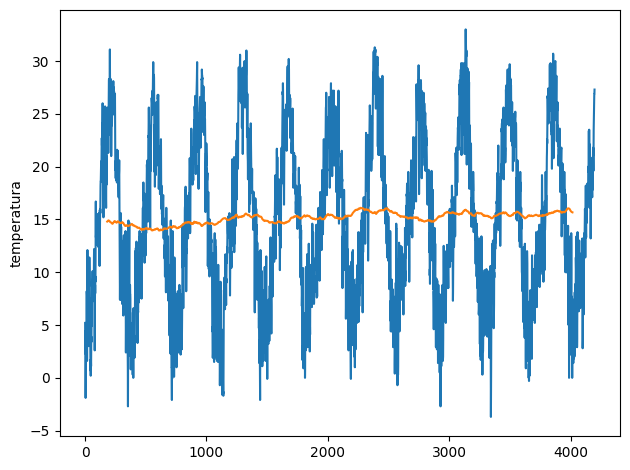

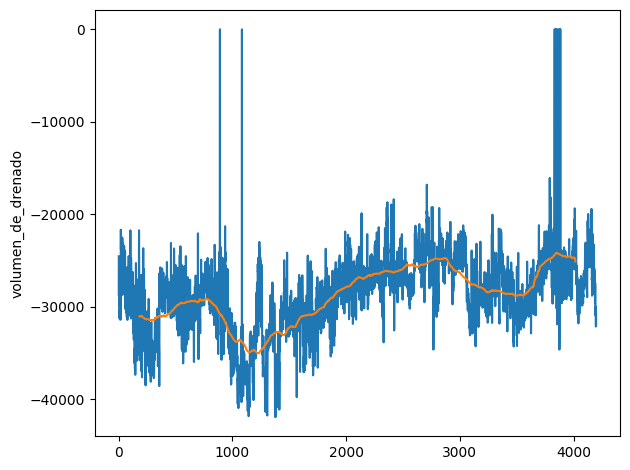

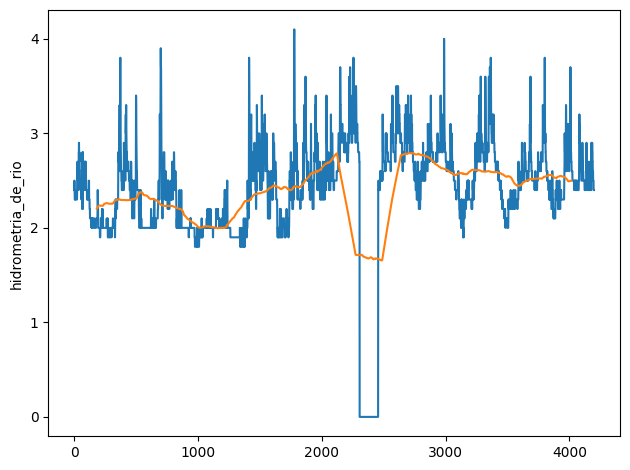

In [119]:
def graf_tendencia(data):
    decomposition = seasonal_decompose(data, model='additive', period=365)
    trend = decomposition.trend
    sns.lineplot(data)
    sns.lineplot(data = trend)
    plt.tight_layout()
    plt.show()


for i, column in enumerate(total_data.drop('fecha', axis=1).columns):
    data  = total_data[column]
    graf_tendencia(data)

In [31]:
# Features (todas las columnas excepto la target)
X = total_data.drop(columns=['Depth_to_Groundwater_P25'])

# Target (solo la columna objetivo)
y = total_data['Depth_to_Groundwater_P25']


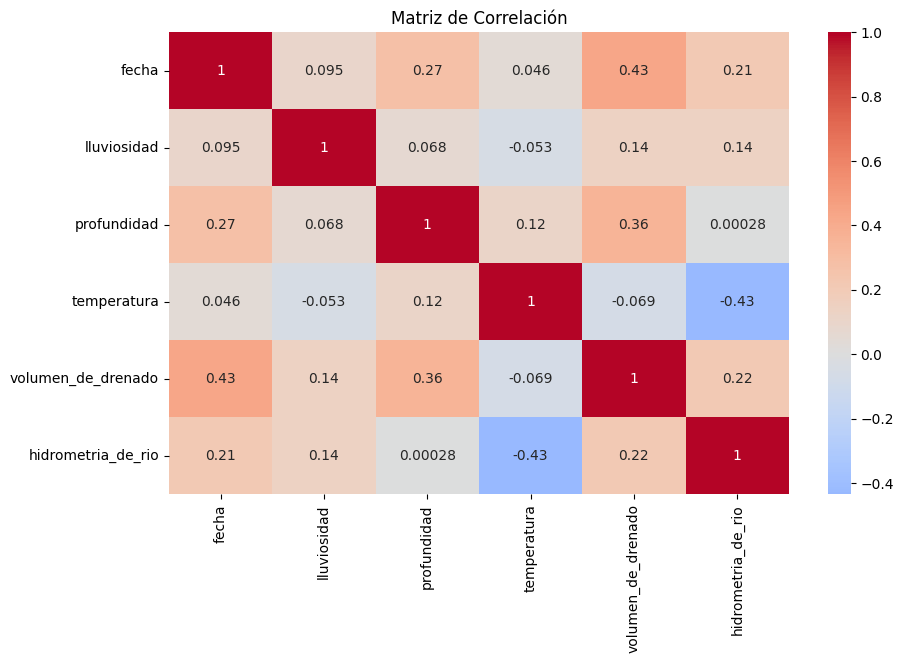

In [120]:


plt.figure(figsize=(10, 6))
sns.heatmap(
    total_data.corr(),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de Correlación')
plt.show()